

# Project: Investigate a Dataset (No-show medical appointments in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The below questions are the question that will be used for exploring the No-show medical appointments in Brazil

1. **Research Question 1**: Does the patient's gender and age affect the enrollment in the Welfare program ?

2. **Research Question 2**: What are the possible factors that affects the show_up status of the appointments?

In [198]:
# The import statements for all of the packages that is used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

>  This **section** of the report is didicated for **checking** the data for **any missing values** or **duplicated row** as well as **cleaning** and **clarifying it** whenever needed

### General Properties

In [199]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


It can be seen that in the above **cell**, the appointment day column has the same time all along which would be removed later for the data to look cleaner

In [200]:
df.info() # Step 1: The check for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The **check** for missing data result: **no missing** data were found

In [201]:
sum(df.duplicated()) #Step 2: The check for duplcated data

0

>The **check** for duplicated data result: **no duplicated** data were found

In [202]:
df.query('Age<0') # Step 3: checking for any row that have age<0 since age cannot be below 0

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [203]:
df.drop(99832, axis = 0,inplace=True) #Drop the rows that have age<0

In [204]:
df.query('Age<0') #Verify that there are no rows that have age<0

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [205]:
# STep 4: The patiend ID and appointment ID columns are irrlevant, as such they will be dropped
df.pop('PatientId')
df.pop('AppointmentID')
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [206]:
# STep 5: cleaneing the Labels of the columns and 
# splitting the time series data to date and time, respictively.
def Date_Time(Sc_D,App_D): #Defining a function to split the scheduled day to date and time 
    df[Sc_D] = pd.to_datetime(df[Sc_D])
    df[App_D] = pd.to_datetime(df[App_D])#convert the appointment day to day only
    df.insert(4,'Scheduled_Day',[d.date() for d in df[Sc_D]])#Add a new column for the schedule_day-date and insert it in the the righ place
    df.insert(5,'Scheduled_Time',[d.time() for d in df[Sc_D]])#add a new column for the schedule_day-time and insert it in the the righ place
    df.pop('ScheduledDay')#Removing the schedule day column
    return df.head()
Date_Time('ScheduledDay','AppointmentDay')

,Gender,AppointmentDay,Age,Scheduled_Day,Scheduled_Time,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,62,2016-04-29,18:38:08,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,56,2016-04-29,16:08:27,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,62,2016-04-29,16:19:04,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,8,2016-04-29,17:29:31,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,56,2016-04-29,16:07:23,JARDIM DA PENHA,0,1,1,0,0,0,No


In [207]:
#Develop a dictinory for a clearer labels
New_Labels_dict = {'AppointmentDay': 'Appointment_Day',
       'Scholarship':'Welfare_Program',
       'Handcap':'Handicap'}
#Renaming the labels 
df=df.rename(columns=New_Labels_dict)
#Removing the spaces form the labels and convert the capital letters to lower case ones.
df.rename(columns=lambda x: x.strip().lower(),inplace=True)    
df.head(1)

,gender,appointment_day,age,scheduled_day,scheduled_time,neighbourhood,welfare_program,hipertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29,62,2016-04-29,18:38:08,JARDIM DA PENHA,0,1,0,0,0,0,No


In the **above two cells**, the Labels of the columns have been cleaned and the time series data has been splitted to date and time, respictively.

In the **'no-show'** column: it says ‘No’ if the patient showed up to their appointment, and the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. if they did not show up which is unclear, as such, **in the next two cells**, we are going to do convert the columns label to **'show_up'** and convert  **Yes** to **no** and  **No** to **yes**. For verificaton, **value_counts()** mehod will be used to verify that the eqivalent number of yeses and nos are equivalent.

In [208]:
df['no-show'].replace({'Yes':'no','No':'yes'},inplace=True)#convert Yes to no and No to yes
df.rename(columns={'no-show':'show_up'}, inplace=True)#convert the columns label to 'show_up' 
df['show_up'].value_counts()

yes    88207
no     22319
Name: show_up, dtype: int64

In [209]:
df.head(1)

,gender,appointment_day,age,scheduled_day,scheduled_time,neighbourhood,welfare_program,hipertension,diabetes,alcoholism,handicap,sms_received,show_up
0,F,2016-04-29,62,2016-04-29,18:38:08,JARDIM DA PENHA,0,1,0,0,0,0,yes


<a id='eda'></a>
## Exploratory Data Analysis

> 

### Research Question 1: Does the patient's gender and age affect the enrollment in the Welfare program ?

In [210]:
# This is to answer the firs part of the question, starting by filtering the data by gender type and welfare_program and then
#the proportions of males and females are calculated to better reflect on the gender numbers.
Male_Female=df.groupby('gender')['welfare_program'].value_counts()
Male_Female_Total=df.groupby('gender')['age'].count()
Male_proportions=(Male_Female['M']/Male_Female_Total['M'])*100
Female_proportions=Male_Female['F']/Male_Female_Total['F']*100

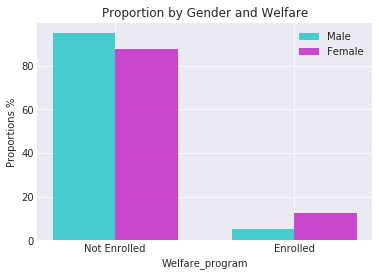

In [211]:
indx = np.arange(len(Male_proportions)) 
width = 0.35 # the width of the bars
# plot bars
Male_bars = plt.bar(indx, Male_proportions, width, color='c', alpha=.7, label='Male')
Female_bars = plt.bar(indx + width, Female_proportions, width, color='m', alpha=.7, label='Female')
# title and labels
plt.ylabel('Proportions %')
plt.xlabel('Welfare_program')
plt.title('Proportion by Gender and Welfare')
locations = indx + width / 2 
labels = ['Not Enrolled', 'Enrolled']
plt.xticks(locations, labels);
# legend
plt.legend();

It can be seen from the **above plot**, that the percentage of Females who are members of the welfare program are higher than that of males. On the other hand there is a big percentage of both genders who are not enrolled in the welfare program in **Brazil**.

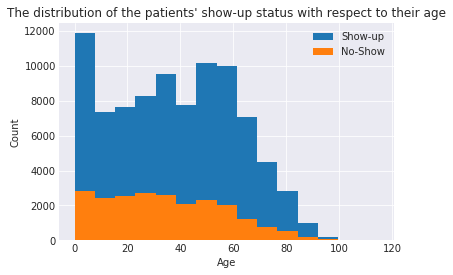

In [212]:
ff=df.query('show_up=="yes"')#filtering the patients who showed up
ff2=df.query('show_up=="no"')#filtering the patients who didn't show up

plt.hist(ff['age'],bins=15, label='Show-up')
plt.hist(ff2['age'],bins=15,label='No-Show')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('The distribution of the patients\' show-up status with respect to their age');
plt.legend(loc='best')
plt.show()

The **distribution** of the patients is right-skewed (positive skewness) where patients above 60 years old are much less compared patients who are younger than 60 years old.

### Research Question 2 :What are the possible factors that affects the show_up status of the appointments?

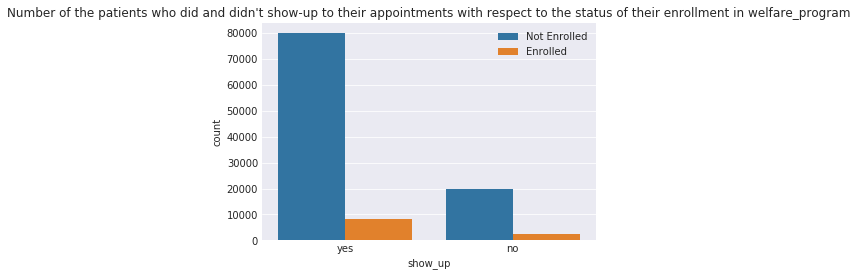

In [213]:
#Plotting the number of the patients who did and didn't show-up to their appointments with respect to
#the status of their enrollment in welfare_program

WF=sns.countplot(x='show_up',data=df, hue='welfare_program')
WF.legend(['Not Enrolled','Enrolled'])
plt.title('Number of the patients who did and didn\'t show-up to their appointments with respect to the status of their enrollment in welfare_program')
plt.show()

It can be see from the above **Figure** that the number of people who are **enrolled** in the welfare-program, is **higher** than those who **aren't enrolled** when it comes to **showing up** for the medical appointmetns in **Brazil**

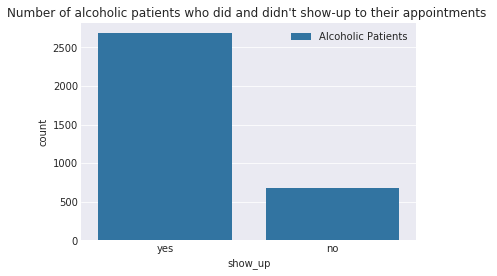

In [214]:
#Plotting the number of alcoholic patients who did and didn't show-up to their appointments 
df_ALC=df.query('alcoholism==1')
ALC=sns.countplot(x='show_up',data=df_ALC, hue='alcoholism')
plt.title('Number of alcoholic patients who did and didn\'t show-up to their appointments ')
ALC.legend(['Alcoholic Patients'])
plt.show()


The above **Figure** shows that **most** of the **alcholic** patients **showed-up** to their appointments 

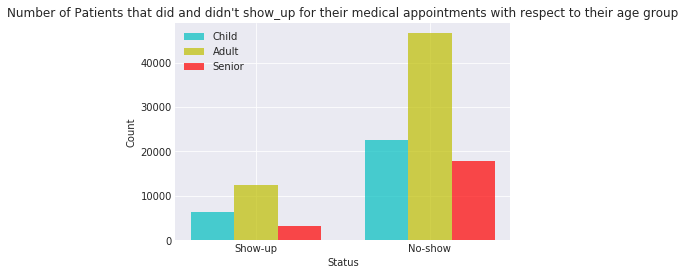

In [215]:
#Plotting the number of the patients who did and didn't show-up to their appointments with respect to
#their age group

#Filter by age group
#Group one for patients aged from 0 to 18 years old
child =df.query('age<19')
child_g=child.groupby('show_up').count()
child_age=child_g['age']

#Group two for patients aged from 19 to 59 years old
adult=df.query('19<age<60')
adult_g=adult.groupby('show_up').count()
adult_age=adult_g['age']

#Group two for patients who are above 60 years old
senior=df.query('age>=60')
senior_g=senior.groupby('show_up').count()
senior_age=senior_g['age']

#plot
width = 0.25
ind=np.arange(len(child_age))
child_bars = plt.bar(ind, child_age, width, color='c', alpha=.7, label='Child')
adult_bars = plt.bar(ind + width, adult_age, width, color='y', alpha=.7, label='Adult')
senior_Adult_bars = plt.bar(ind + (2*width), senior_age, width, color='r', alpha=.7, label='Senior')

# title and labels
plt.ylabel('Count')
plt.xlabel('Status')
plt.title('Number of Patients that did and didn\'t show_up for their medical appointments with respect to their age group')
locations = ind + width 
labels = ['Show-up', 'No-show']
plt.xticks(locations, labels);
plt.legend();

This **Figure** shows a comparison between the **patients' show-up status** with respect to their **age group**

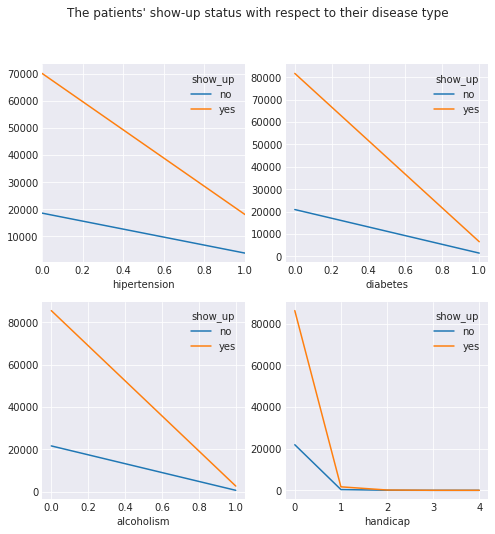

In [216]:
# this cell aimed at plotting the patients' show-up status with respect to their disease type, start by grouping the data by
#disease and show up status
df_hipertension=df.groupby(['hipertension','show_up'])['show_up'].count()
df_diabetes=df.groupby(['diabetes','show_up'])['show_up'].count()
df_alcoholism=df.groupby(['alcoholism','show_up'])['show_up'].count()
df_handicap=df.groupby(['handicap','show_up'])['show_up'].count()

fig, axes = plt.subplots(nrows=2, ncols=2)

df_hipertension.unstack().plot(ax=axes[0,0],figsize=(8, 8),scalex=False)
df_diabetes.unstack().plot(ax=axes[0,1],figsize=(8, 8))
df_alcoholism.unstack().plot(ax=axes[1,0],figsize=(8, 8))
df_handicap.unstack().plot(ax=axes[1,1],figsize=(8, 8))

fig.suptitle(('The patients\' show-up status with respect to their disease type'))

plt.show()

The **above graphs** shows that patients suffer from **hypertension** and **diabetes** are more likely to miss their appointments when compared to alcoholic and handicapped patients.
**Please note** that the x-axis value is either **one** or **zer**o where one means that the patients has the disease while zero means they don't have it, this applies for **all** graphs, however; for the handicap graph, the handicap status is further graded from **one** to **four** 

<a id='conclusions'></a>
## Conclusions

**Three** factors have been analyzed to check for the effect on the showing up to appointments. these factors are as follows:
**1**-Age Group: children and senior patients are more likely to miss their appointments
**2**-Enrollement to the welfare program: patiens enrolled in the welfare program are more likely to miss their appointments
**3**-Alcholism: no odds have been noticed concerning alcholic patients behaviour towards showing up to their medical appointments

For the **enrollemnt to the welfare-programs**, it has been found that the percentage of the enrolled females are noticably higher than that of enrolled males, While the percentage of enrolled patients of both genders in the program is signifcany smaller than those who are not enrolled

### Limitations
1. The analysis is limited to the available data about the males and femal patients 
2. The analysis results concerning teh scond part of the anaylsis might be misleading as no proportions have been considred for the data which could have affected the precision of the results.
.


## **References**

1. https://stackoverflow.com/questions/33149428/modify-the-legend-of-pandas-bar-plot
2. https://www.geeksforgeeks.org/python-pandas-index-value_counts/#:~:text=value_counts()%20function%20returns%20object,Excludes%20NA%20values%20by%20default.
3. https://www.geeksforgeeks.org/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/
4. https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns
5. https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
6. 

In [217]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0